In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_histogram(data=None, class_edges=None, frequency_table=None, relative=False, density=False,
                              title="Histogramm", xlabel=None, ylabel=None, xrotation=0):
    """
    Erstellt ein Histogramm basierend auf den angegebenen Daten und Klassenrändern oder einer Häufigkeitstabelle.
    Optional kann die relative Häufigkeit berechnet und in Prozent auf der y-Achse angezeigt werden,
    oder die Häufigkeitsdichte angezeigt werden, wenn 'density=True' ist. Die x-Achsen-Beschriftungen können
    mit 'xrotation' um einen bestimmten Winkel rotiert werden.
    """
    
    fig, axes = plt.subplots(figsize=(10, 6))
    sns.set_palette("crest")

    if frequency_table is not None:
        # Verarbeite die Häufigkeitstabelle und berechne die Klassenbreiten und Grenzen
        absolute_frequencies = frequency_table["Absolute Häufigkeit"]
        classes = frequency_table["Klassen"]
        total = sum(absolute_frequencies)  # Gesamtzahl für relative Häufigkeit

        class_widths = []
        class_centers = []
        class_edges = []
        for b in classes:
            start, end = map(int, b.strip("[]()").split(";"))
            width = end - start
            center = (start + end) / 2
            class_widths.append(width)
            class_centers.append(center)
            class_edges.append(start)
        class_edges.append(end)  # Füge das letzte Ende hinzu
        
        # Berechne relative Häufigkeit und Häufigkeitsdichte
        if density:
            relative_frequencies = [freq / total for freq in absolute_frequencies]
            frequencies = [rel_freq / width for rel_freq, width in zip(relative_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Häufigkeitsdichte"
        elif relative:
            frequencies = [(freq / total) * 100 for freq in absolute_frequencies]
            ylabel = ylabel if ylabel else "Relative Häufigkeit (%)"
        else:
            frequencies = absolute_frequencies
            ylabel = ylabel if ylabel else "Absolute Häufigkeit"
        
        # Plotting mit plt.bar() für variierende Breiten
        bars = plt.bar(class_centers, frequencies, width=class_widths, align='center', edgecolor='black')
        
        # Setze die Klassenränder als xtick-Beschriftungen, um die Abstände deutlich zu machen
        axes.set_xticks(class_edges)
        axes.set_xticklabels(class_edges, rotation=xrotation)
        
        # Füge relative Häufigkeit (Fläche) innerhalb der Balken hinzu und Säulenhöhe knapp über dem Balken, wenn density=True
        if density:
            for bar, freq, rel_freq in zip(bars, frequencies, relative_frequencies):
                # Relative Häufigkeit (Fläche) innerhalb des Balkens
                axes.text(
                    bar.get_x() + bar.get_width() / 2,
                    freq / 2,
                    f"{rel_freq * 100:.2f}%",
                    ha="center",
                    va="center",
                    color="black",
                    fontsize=8
                )
                # Säulenhöhe (Häufigkeitsdichte) knapp über dem Balken
                axes.text(
                    bar.get_x() + bar.get_width() / 2,
                    freq + (freq * 0.05),
                    f"{freq:.5f}",
                    ha="center",
                    va="bottom",
                    color="black",
                    fontsize=8
                )
        
    else:
        if data is None or class_edges is None:
            raise ValueError("Entweder 'data' und 'class_edges' oder 'frequency_table' muss übergeben werden.")
        
        counts, bin_edges = np.histogram(data, bins=class_edges)
        class_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        class_widths = np.diff(bin_edges)
        
        if density:
            total = np.sum(counts)
            relative_frequencies = [count / total for count in counts]
            hist = [rel_freq / width for rel_freq, width in zip(relative_frequencies, class_widths)]
            ylabel = ylabel if ylabel else "Häufigkeitsdichte"
            
        elif relative:
            total = np.sum(counts)
            hist = (counts / total) * 100
            ylabel = ylabel if ylabel else "Relative Häufigkeit (%)"
        else:
            hist = counts
            ylabel = ylabel if ylabel else "Absolute Häufigkeit"

        bars = plt.bar(class_centers, hist, width=class_widths, align='center', edgecolor='black')
        
        # Füge relative Häufigkeit (Fläche) innerhalb der Balken und Säulenhöhe knapp über den Balken hinzu, wenn density=True
        if density:
            for bar, density_val, rel_freq in zip(bars, hist, relative_frequencies):
                # Relative Häufigkeit (Fläche) innerhalb des Balkens
                axes.text(
                    bar.get_x() + bar.get_width() / 2,
                    density_val / 2,
                    f"{rel_freq * 100:.2f}%",
                    ha="center",
                    va="center",
                    color="black",
                    fontsize=8
                )
                # Säulenhöhe (Häufigkeitsdichte) knapp über dem Balken
                axes.text(
                    bar.get_x() + bar.get_width() / 2,
                    density_val + (density_val * 0.05),
                    f"{density_val:.5f}",
                    ha="center",
                    va="bottom",
                    color="black",
                    fontsize=8
                )
    
    # Titel und Achsenbeschriftungen
    axes.set_title(title, pad=20)
    axes.set_xlabel(xlabel if xlabel else ("Klassenränder"))
    axes.set_ylabel(ylabel)
    axes.grid(True, linestyle="--", alpha=0.7, axis="y")
    
    sns.despine()
    plt.tight_layout()

    if frequency_table is not None:
        return frequencies, classes
    else:
        return hist, class_centers

([0.0033898305084745766,
  0.02033898305084746,
  0.011016949152542373,
  0.0211864406779661],
 ['[160; 175)', '[175; 190)', '[190; 210)', '[210; 230)'])

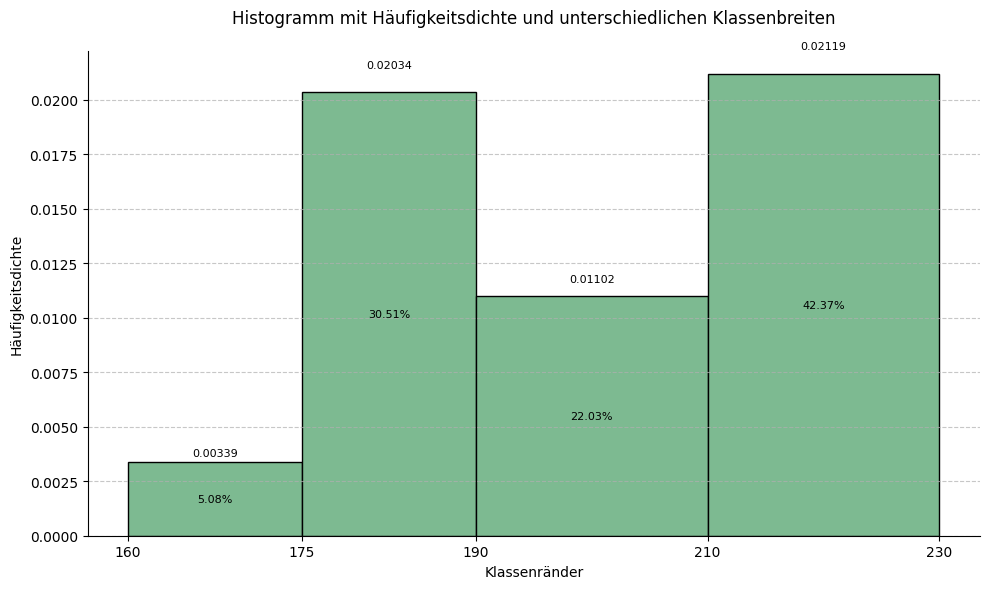

In [59]:
# Beispiel einer Häufigkeitstabelle mit ungleichen Klassenbreiten
frequency_table = {
    "Absolute Häufigkeit": [3, 18, 13, 25],
    "Klassen": ["[160; 175)", "[175; 190)", "[190; 210)", "[210; 230)"]
}

# Aufruf der Funktion mit density=True, um die Häufigkeitsdichte darzustellen
create_histogram(
    frequency_table=frequency_table, 
    density=True, 
    title="Histogramm mit Häufigkeitsdichte und unterschiedlichen Klassenbreiten",
)
